# **Malaria Detection**

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


### <b>Loading libraries</b>

In [ ]:
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Storing the path of the data file
path = "cell_images.zip"

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)


###<b> Check the shape of train and test images

In [ ]:
print('Train images:', train_images.shape, 'Test images:', test_images.shape)


Train images: (24958, 64, 64, 3) Test images: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
print('Train labels:', train_labels.shape, 'Test labels:', test_labels.shape)

Train labels: (24958,) Test labels: (2600,)


####<b> Observations and insights: Both the train and test set images are 64x64. The train set is 24958 images and the test set is 2600 images.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
train_minimum = train_images.min(axis=0).min(axis=0)
train_minimum

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [ ]:
train_maximum = train_images.max(axis=0).max(axis=0)
train_maximum

array([[255, 229, 233],
       [255, 223, 240],
       [255, 239, 240],
       [255, 239, 233],
       [255, 241, 228],
       [255, 238, 239],
       [255, 241, 231],
       [255, 242, 227],
       [255, 231, 228],
       [255, 235, 235],
       [255, 241, 234],
       [255, 236, 237],
       [255, 238, 231],
       [255, 244, 227],
       [255, 239, 232],
       [255, 237, 233],
       [255, 233, 230],
       [255, 239, 230],
       [255, 237, 231],
       [255, 230, 229],
       [255, 232, 229],
       [255, 235, 227],
       [255, 234, 229],
       [255, 233, 234],
       [255, 233, 227],
       [255, 234, 228],
       [255, 230, 231],
       [255, 231, 229],
       [255, 239, 227],
       [255, 231, 228],
       [255, 229, 226],
       [255, 231, 229],
       [255, 231, 233],
       [255, 230, 228],
       [255, 230, 226],
       [255, 237, 227],
       [255, 229, 229],
       [255, 234, 226],
       [255, 231, 233],
       [255, 234, 231],
       [255, 230, 231],
       [255, 235

In [ ]:
test_minimum = test_images.min(axis=0).min(axis=0)
test_minimum

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [ ]:
test_maximum =test_images.max(axis=0).min(axis=0)
test_maximum

array([[208, 169, 161],
       [204, 163, 161],
       [219, 169, 161],
       [219, 171, 163],
       [219, 171, 163],
       [215, 177, 165],
       [215, 175, 167],
       [223, 186, 177],
       [222, 183, 171],
       [219, 184, 169],
       [224, 179, 169],
       [230, 179, 171],
       [225, 182, 186],
       [228, 178, 185],
       [229, 182, 183],
       [228, 180, 186],
       [229, 181, 185],
       [228, 184, 187],
       [228, 182, 187],
       [229, 182, 186],
       [231, 182, 186],
       [230, 182, 185],
       [231, 182, 186],
       [232, 183, 186],
       [231, 185, 187],
       [229, 185, 186],
       [224, 183, 187],
       [225, 184, 187],
       [226, 181, 187],
       [227, 181, 187],
       [226, 182, 187],
       [226, 184, 188],
       [225, 181, 188],
       [226, 180, 187],
       [228, 183, 186],
       [228, 186, 187],
       [228, 183, 186],
       [227, 181, 186],
       [229, 180, 187],
       [227, 183, 186],
       [228, 180, 186],
       [227, 188

####<b> Observations and insights: _____



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
df = pd.DataFrame({'Label': train_labels})
value_counts = df['Label'].value_counts()
print(value_counts)

1    12582
0    12376
Name: Label, dtype: int64


####1 represents the 12582 parasitized images
####0 represents the 12376 uninfected images

###<b>Normalize the images

In [ ]:
train_images = (train_images/train_images.max()).astype('float32')

test_images = (test_images/test_images.max()).astype('float32')

print (f'new train minimum = {train_images.min()}')
print (f'new test maximum = {test_images.max()}')

new train minimum = 0.0
new test maximum = 1.0


####<b> Observations and insights: _____

###<b> Plot to check if the data is balanced

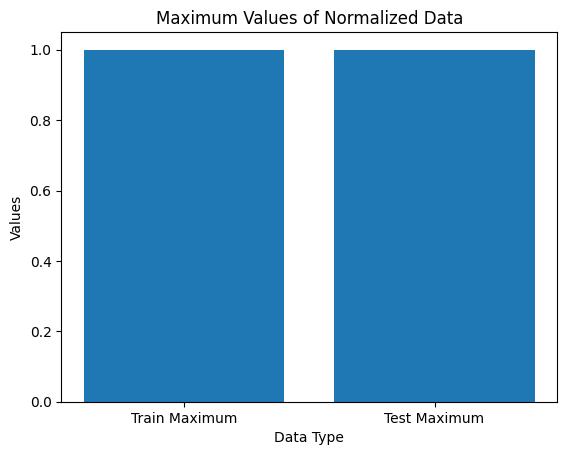

In [ ]:
maximum_values = [train_images.max(), test_images.max()]
labels =['Train Maximum', 'Test Maximum']

# Create a bar plot
plt.bar(labels, maximum_values)

# Add labels and title
plt.xlabel('Data Type')
plt.ylabel('Values')
plt.title('Maximum Values of Normalized Data')

# Show the plot
plt.show()


####<b> Observations and insights: The maximum values of the train and test set are normalized to 1.

> Indented block



### <b>Data Exploration</b>
Let's visualize the images from the train data

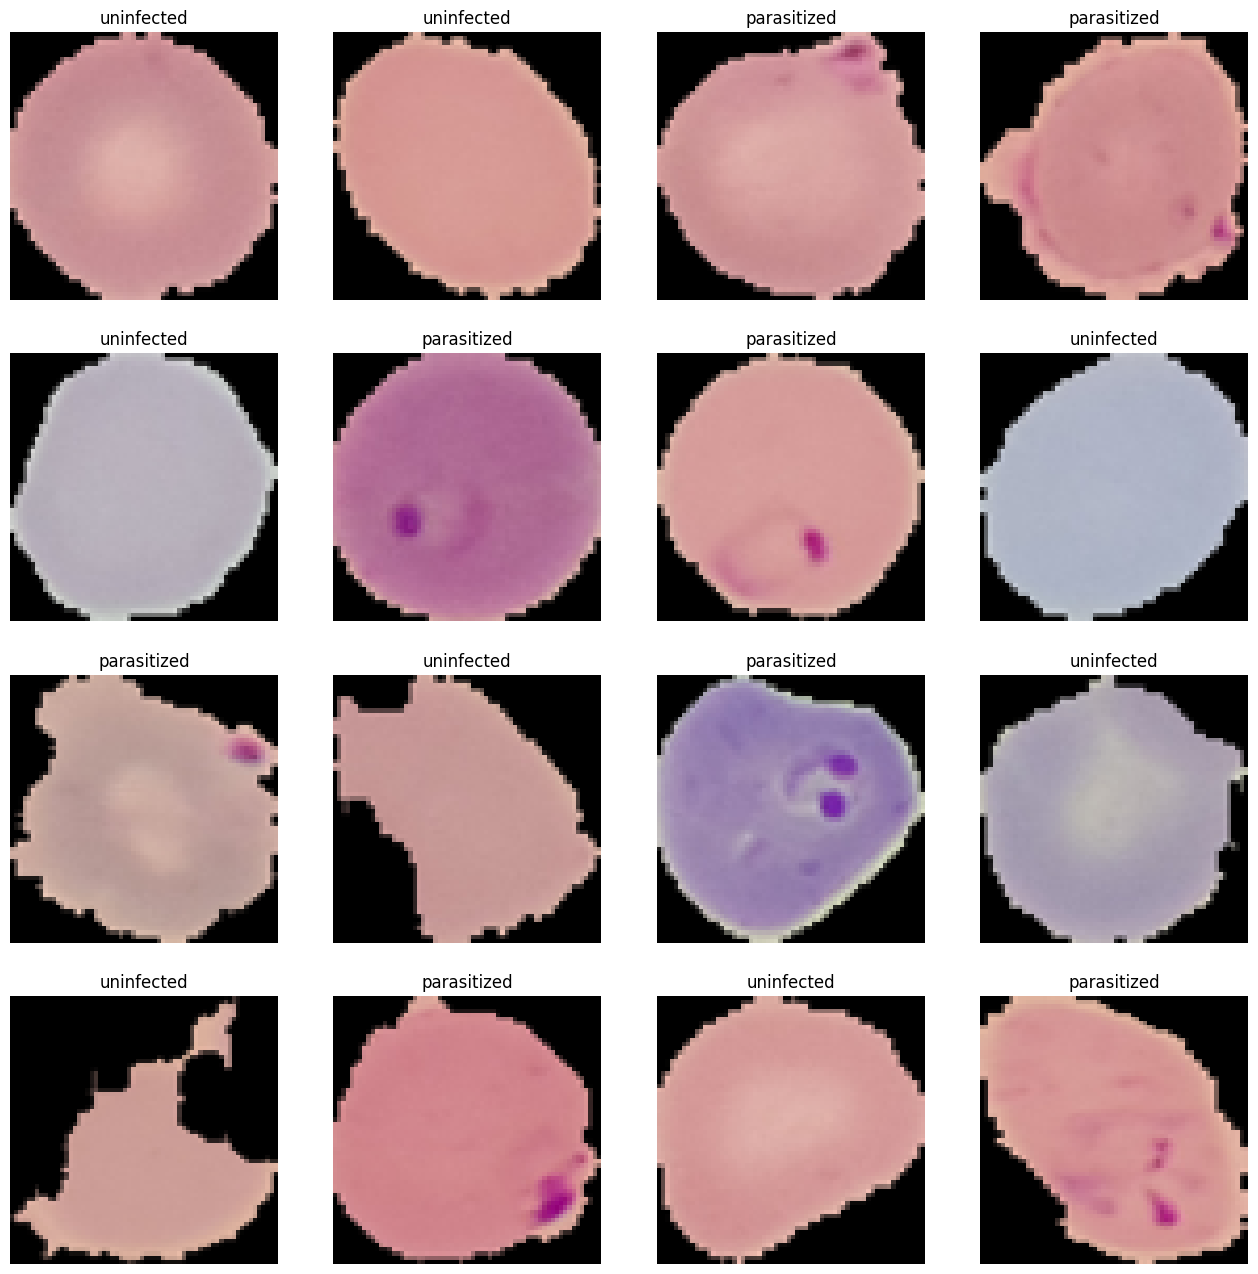

In [ ]:
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: The parasitized samples have a distinct darker purpleish spot.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

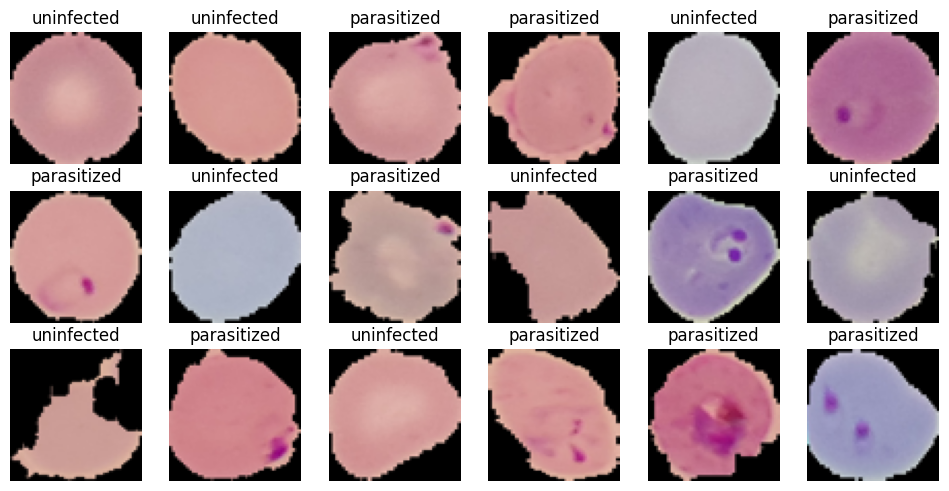

In [ ]:
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 19):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')



####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

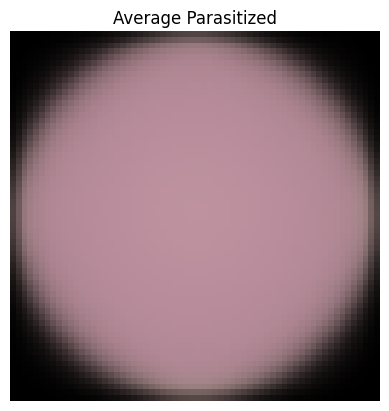

In [ ]:
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

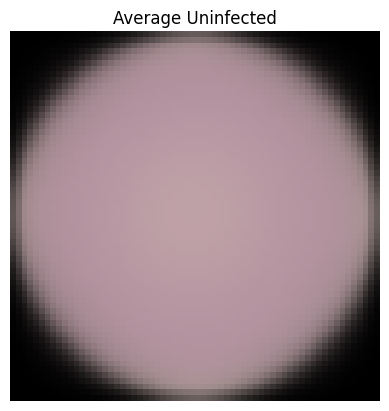

In [ ]:
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean




####<b> Observations and insights: The average parasitized image does not have any visible purple spot. It is slightly darker than the average uninfected

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

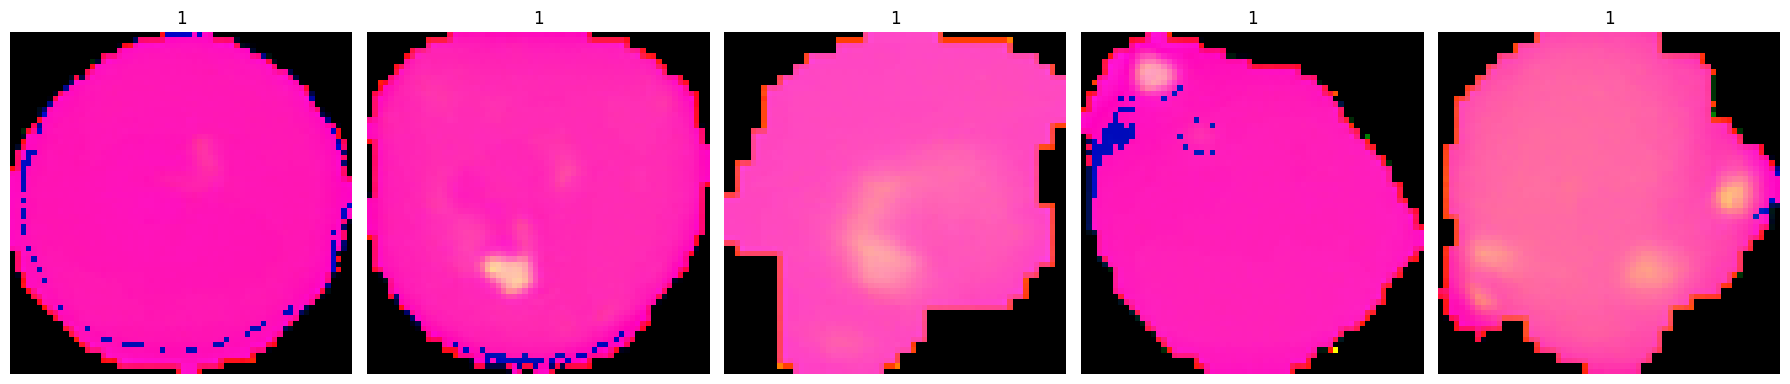

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

In [ ]:
gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

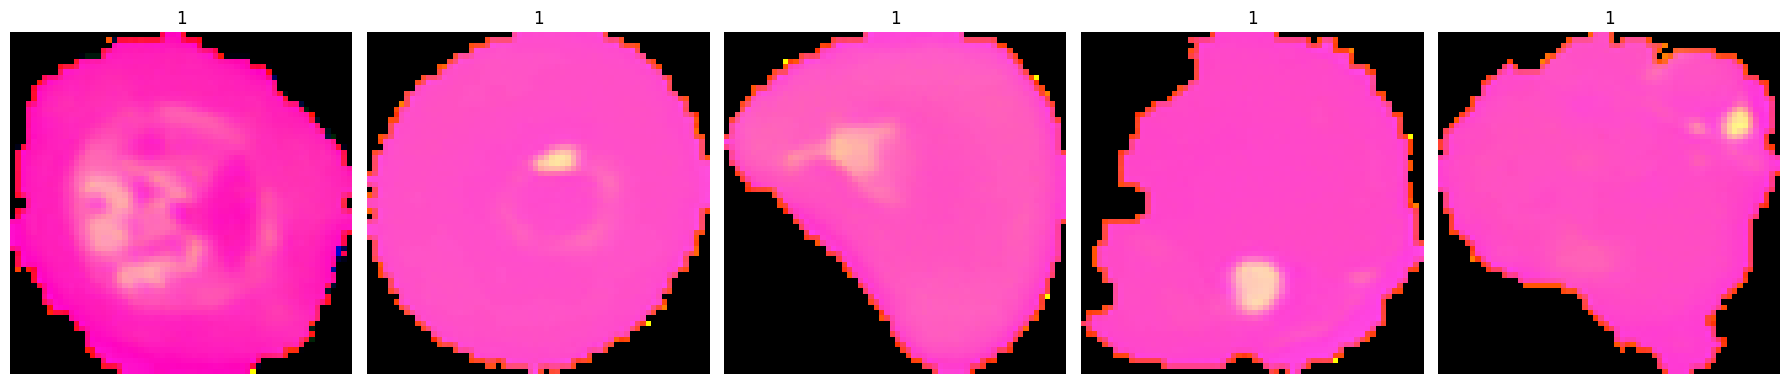

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####<b>Observations and insights: The test data has one image with a blue spot rather than a white/yellow one. I don't know if this is the only parasatized one shown, or if something else is happening

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

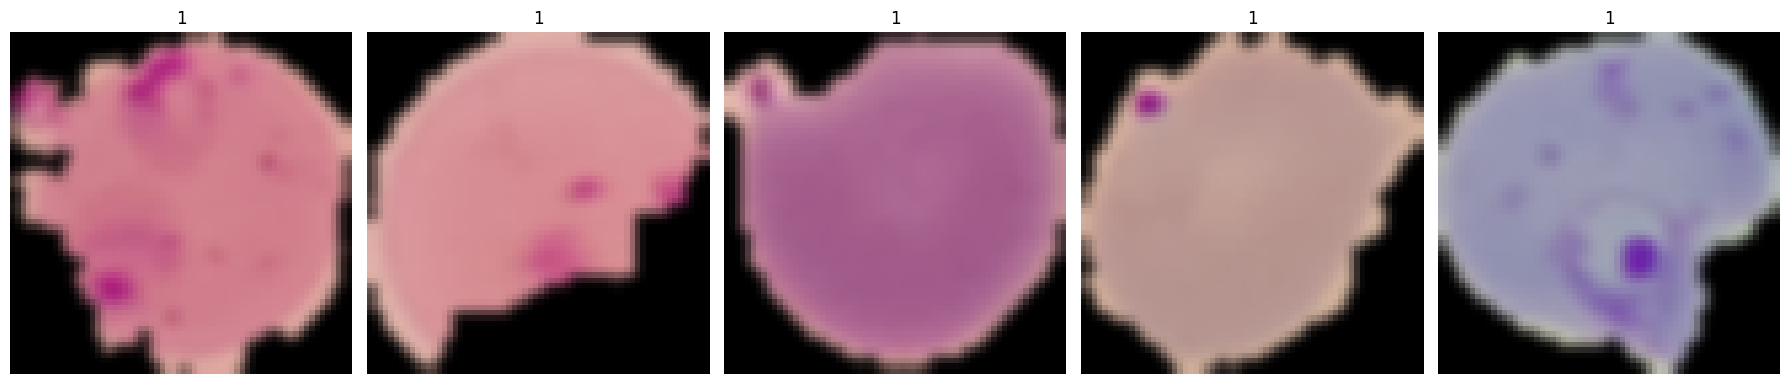

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

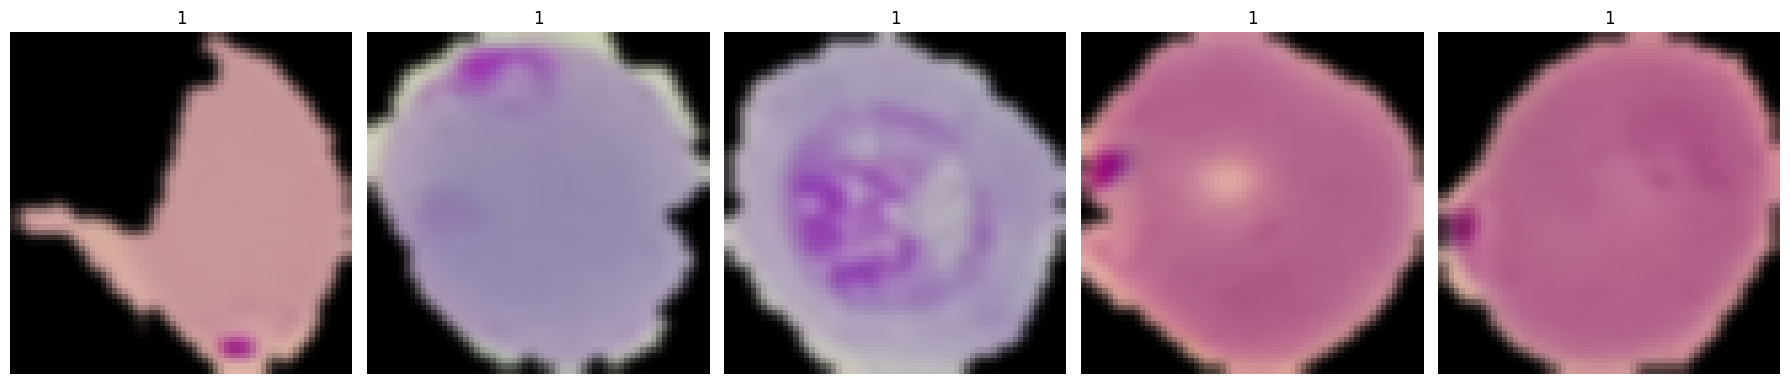

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####**Observations and insights: Blurring may make any gradients visible in the high definition image disappear and draw a more clear distinction between the two colors seen in a parasatized sample. Though smaller spots seem to be less visible than in the original image to my eyes, perhaps the model will perform better with it.

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, MaxPooling2D, Flatten, LeakyReLU, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras import regularizers, optimizers

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

###<b> Building the model

In [ ]:
#y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
#y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 16s 8ms/step - loss: 0.3846 - accuracy: 0.8229 - val_loss: 0.2008 - val_accuracy: 0.8996
Epoch 2/20
624/624 [==============================] - 5s 9ms/step - loss: 0.1279 - accuracy: 0.9499 - val_loss: 0.1573 - val_accuracy: 0.9375
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.1123 - accuracy: 0.9633 - val_loss: 0.1045 - val_accuracy: 0.9790
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0863 - accuracy: 0.9724 - val_loss: 0.0650 - val_accuracy: 0.9860
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0714 - accuracy: 0.9772 - val_loss: 0.0746 - val_accuracy: 0.9838
Epoch 6/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0658 - accuracy: 0.9784 - val_loss: 0.1411 - val_accuracy: 0.9655


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



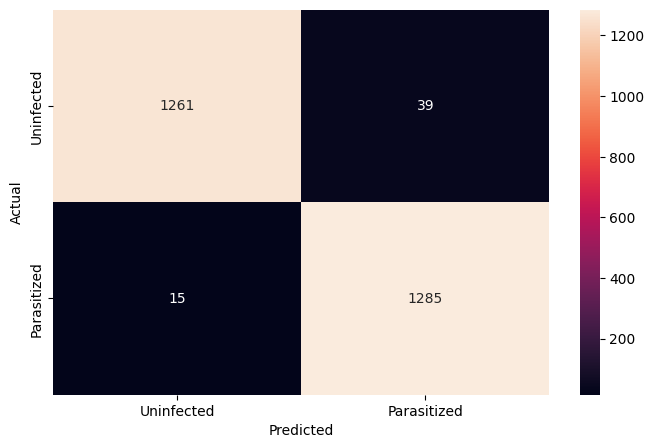

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

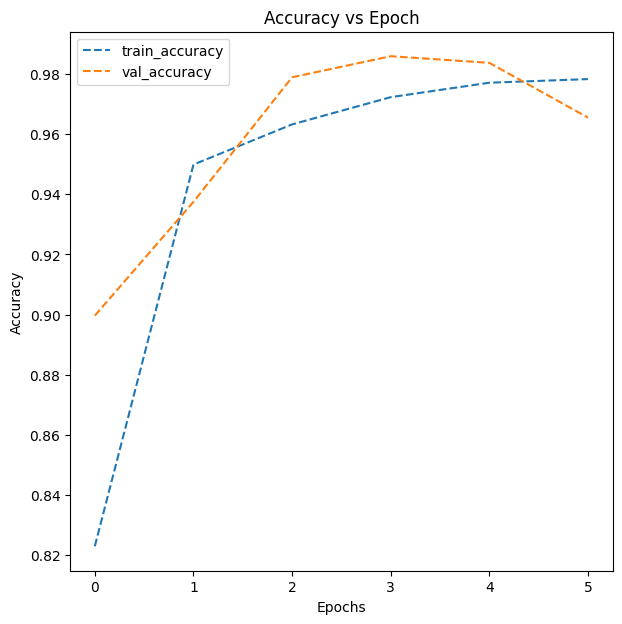

In [ ]:
plot_accuracy(history)

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


###<b> Building the Model

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation="softmax"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)       

###<b> Compiling the model

In [ ]:
model1.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 13s 13ms/step - loss: 0.2910 - accuracy: 0.8598 - val_loss: 0.0928 - val_accuracy: 0.9852
Epoch 2/20
624/624 [==============================] - 8s 12ms/step - loss: 0.0905 - accuracy: 0.9705 - val_loss: 0.0811 - val_accuracy: 0.9840
Epoch 3/20
624/624 [==============================] - 7s 12ms/step - loss: 0.0802 - accuracy: 0.9728 - val_loss: 0.0751 - val_accuracy: 0.9826
Epoch 4/20
624/624 [==============================] - 8s 12ms/step - loss: 0.0716 - accuracy: 0.9762 - val_loss: 0.0707 - val_accuracy: 0.9814
Epoch 5/20
624/624 [==============================] - 8s 12ms/step - loss: 0.0662 - accuracy: 0.9779 - val_loss: 0.0691 - val_accuracy: 0.9804
Epoch 6/20
624/624 [==============================] - 7s 12ms/step - loss: 0.0682 - accuracy: 0.9779 - val_loss: 0.0713 - val_accuracy: 0.9794
Epoch 7/20
624/624 [==============================] - 7s 12ms/step - loss: 0.0649 - accuracy: 0.9777 - val_loss: 0.0836 - val_accuracy: 0.975

###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9827

 Test_Accuracy:- 0.982692301273346


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



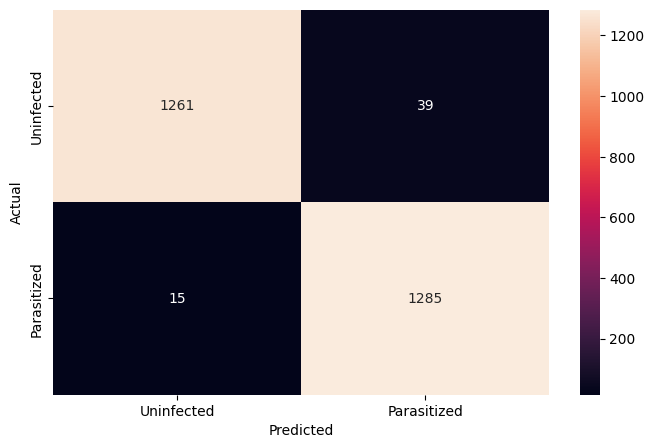

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [ ]:
def plot_accuracy(history1):

    N = len(history1.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

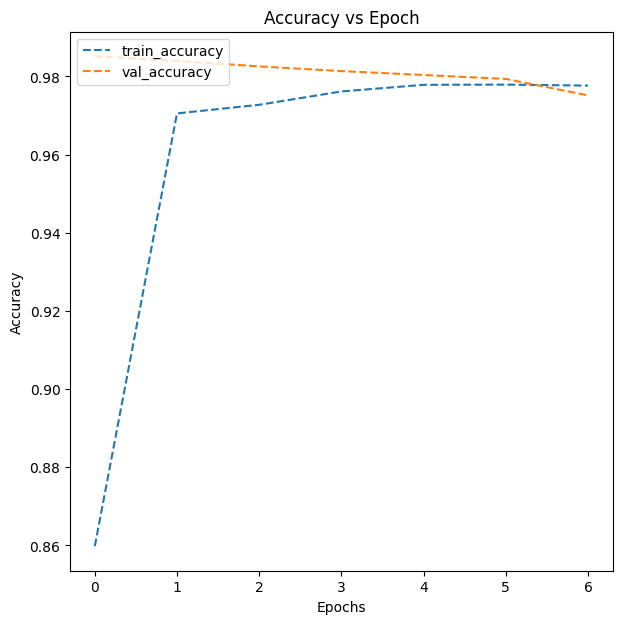

In [ ]:
plot_accuracy(history1)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=3, padding="same", input_shape=(64, 64, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=64, kernel_size=3, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=128, kernel_size=3, padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.5))

model2.add(Dense(2, activation="softmax"))

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        3

###<b>Compiling the model

In [ ]:
model2.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 15s 19ms/step - loss: 0.3295 - accuracy: 0.8630 - val_loss: 0.0093 - val_accuracy: 0.9986
Epoch 2/20
624/624 [==============================] - 11s 18ms/step - loss: 0.1118 - accuracy: 0.9615 - val_loss: 0.0308 - val_accuracy: 0.9930
Epoch 3/20
624/624 [==============================] - 12s 19ms/step - loss: 0.0972 - accuracy: 0.9657 - val_loss: 0.0397 - val_accuracy: 0.9914


<b>Plotting the train and validation accuracy

In [ ]:
def plot_accuracy(history2):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

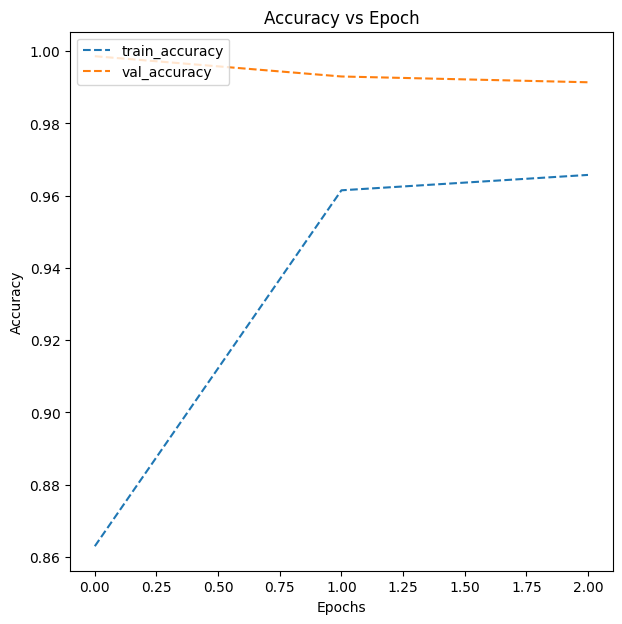

In [ ]:
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.0819 - accuracy: 0.9750

 Test_Accuracy:- 0.9750000238418579


####<b>Observations and insights: This model is much slower taking almost 8 minutes per epoch. The computing time is a significant hindrance and there's no improvement in the accuracy.

<b> Generate the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1300
           1       0.99      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.98      0.97      0.97      2600
weighted avg       0.98      0.97      0.97      2600



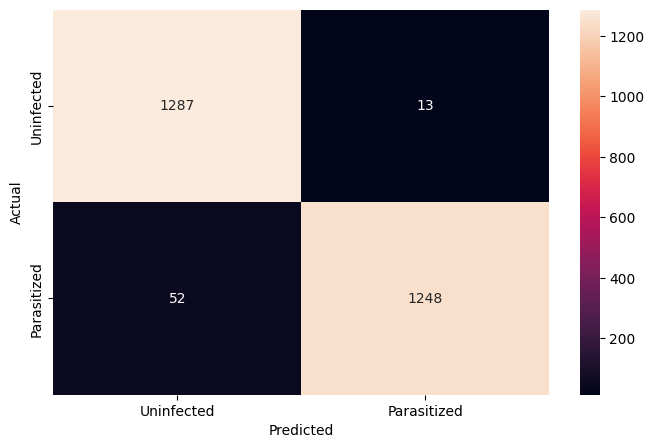

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Use image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

Checking if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

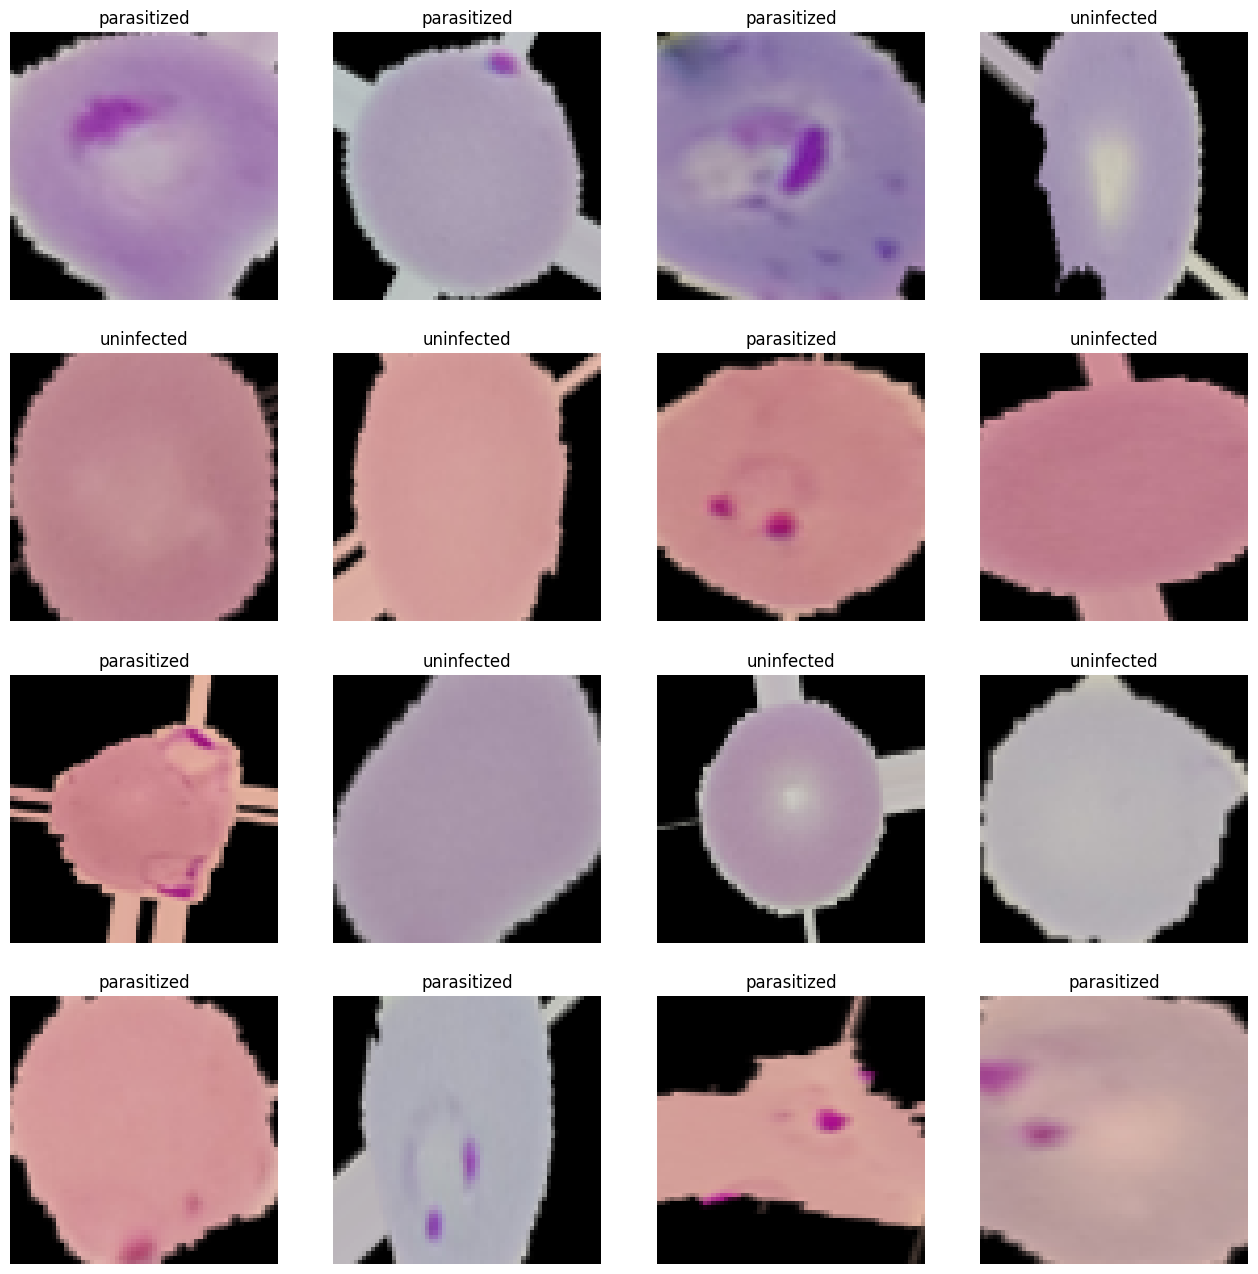

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: The new images are still identified as parasitized by the same spot of discoloration. I doubt I'll see a significant change in accuracy with the new images.

###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax"))

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 31s 93ms/step - loss: 0.6540 - accuracy: 0.6120 - val_loss: 0.6019 - val_accuracy: 0.7522
Epoch 2/20
312/312 [==============================] - 29s 92ms/step - loss: 0.3959 - accuracy: 0.8356 - val_loss: 0.1571 - val_accuracy: 0.9449
Epoch 3/20
312/312 [==============================] - 28s 90ms/step - loss: 0.2149 - accuracy: 0.9193 - val_loss: 0.1451 - val_accuracy: 0.9563
Epoch 4/20
312/312 [==============================] - 28s 91ms/step - loss: 0.1963 - accuracy: 0.9296 - val_loss: 0.1295 - val_accuracy: 0.9679
Epoch 5/20
312/312 [==============================] - 29s 92ms/step - loss: 0.1885 - accuracy: 0.9355 - val_loss: 0.1138 - val_accuracy: 0.9706
Epoch 6/20
312/312 [==============================] - 28s 91ms/step - loss: 0.1793 - accuracy: 0.9375 - val_loss: 0.1055 - val_accuracy: 0.9708
Epoch 7/20
312/312 [==============================] - 29s 92ms/step - loss: 0.1705 - accuracy: 0.9418 - val_loss: 0.0990 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

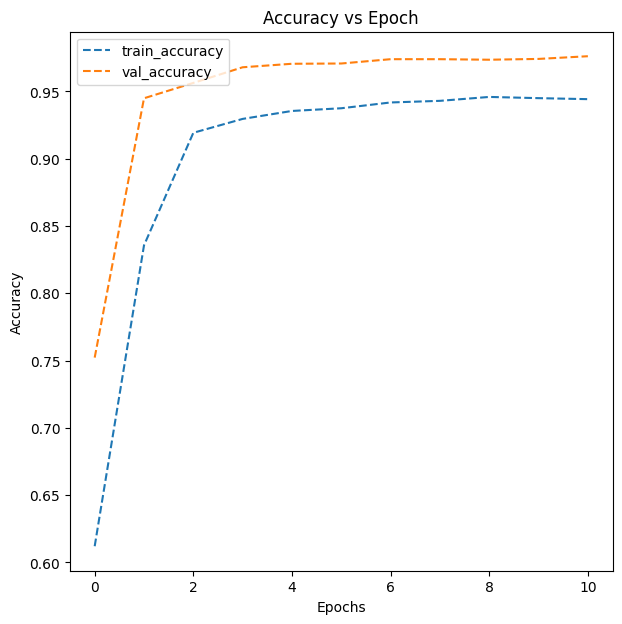

In [ ]:
plot_accuracy(history3)

In [ ]:
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0873 - accuracy: 0.9831

 Test_Accuracy:- 0.9830769300460815


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



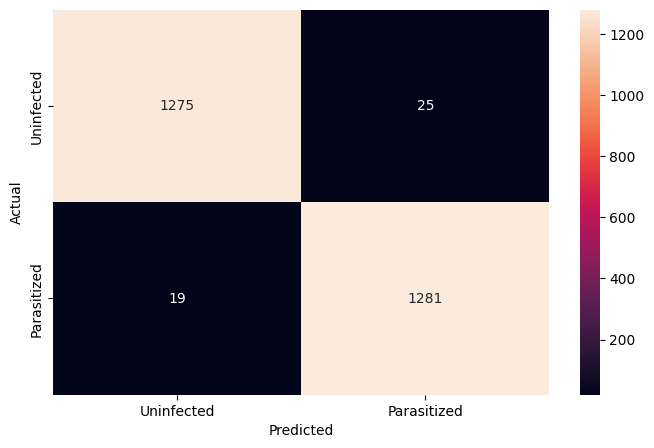

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
model4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

<b> using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history4 = model4.fit(
            x=train_images, y=train_labels,
            epochs = 20,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/20
624/624 [==============================] - 17s 23ms/step - loss: 0.2398 - accuracy: 0.9010 - val_loss: 0.3350 - val_accuracy: 0.8676
Epoch 2/20
624/624 [==============================] - 13s 21ms/step - loss: 0.1929 - accuracy: 0.9253 - val_loss: 0.3736 - val_accuracy: 0.8626
Epoch 3/20
624/624 [==============================] - 13s 21ms/step - loss: 0.1786 - accuracy: 0.9316 - val_loss: 0.1456 - val_accuracy: 0.9575
Epoch 4/20
624/624 [==============================] - 13s 21ms/step - loss: 0.1776 - accuracy: 0.9308 - val_loss: 0.1140 - val_accuracy: 0.9679
Epoch 5/20
624/624 [==============================] - 13s 21ms/step - loss: 0.1722 - accuracy: 0.9345 - val_loss: 0.0894 - val_accuracy: 0.9810
Epoch 6/20
624/624 [==============================] - 13s 20ms/step - loss: 0.1710 - accuracy: 0.9359 - val_loss: 0.2545 - val_accuracy: 0.9157
Epoch 7/20
624/624 [==============================] - 13s 20ms/step - loss: 0.1670 - accuracy: 0.9364 - val_loss: 0.1271 - val_accuracy:

<b>Plot the train and validation accuracy

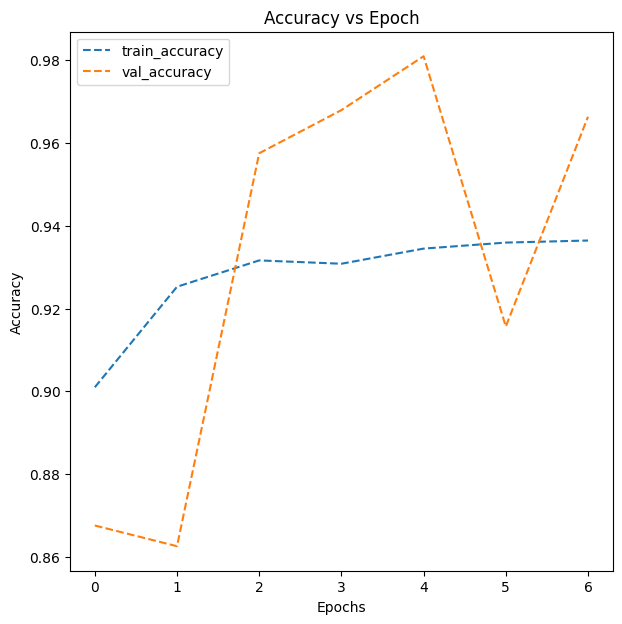

In [ ]:
plot_accuracy(history4)

###**Observations and insights:**

*  The validation curve dips significantly towards the end of my tests. The train accuracy stabalizes at nearly 94% but the validation accuracy is higher for several epochs going up as high as 98%.

###<b> Evaluating the model

In [ ]:
accuracy = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 2s 20ms/step - loss: 0.1503 - accuracy: 0.9485

 Test_Accuracy:- 0.9484615325927734


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



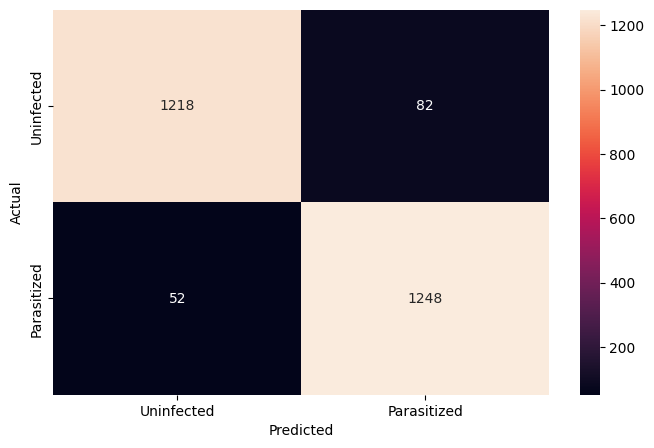

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Further Improvements on the base model**

I wanted to further research adding more layers to my base model. This model expands on model1.


In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
model5 = Sequential()

model5.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.25))

# Additional Convolutional Layer
model5.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.25))

model5.add(Flatten())

# Additional Dense Layer
model5.add(Dense(512, activation="relu"))
model5.add(Dropout(0.5))

# Additional Dense Layer
model5.add(Dense(256, activation="relu"))
model5.add(Dropout(0.5))

model5.add(Dense(2, activation="softmax"))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
model5.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history5 = model5.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 12s 14ms/step - loss: 0.6566 - accuracy: 0.6285 - val_loss: 0.8567 - val_accuracy: 0.0000e+00
Epoch 2/20
624/624 [==============================] - 8s 12ms/step - loss: 0.3671 - accuracy: 0.8106 - val_loss: 0.1410 - val_accuracy: 0.9804
Epoch 3/20
624/624 [==============================] - 8s 13ms/step - loss: 0.1071 - accuracy: 0.9686 - val_loss: 0.0689 - val_accuracy: 0.9842
Epoch 4/20
624/624 [==============================] - 8s 13ms/step - loss: 0.0855 - accuracy: 0.9733 - val_loss: 0.0908 - val_accuracy: 0.9649
Epoch 5/20
624/624 [==============================] - 8s 12ms/step - loss: 0.0786 - accuracy: 0.9752 - val_loss: 0.0633 - val_accuracy: 0.9758
Epoch 6/20
624/624 [==============================] - 8s 13ms/step - loss: 0.0788 - accuracy: 0.9767 - val_loss: 0.0823 - val_accuracy: 0.9657
Epoch 7/20
624/624 [==============================] - 8s 12ms/step - loss: 0.0772 - accuracy: 0.9770 - val_loss: 0.0970 - val_accuracy: 0

In [ ]:
accuracy5 = model5.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy5[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0671 - accuracy: 0.9796

 Test_Accuracy:- 0.9796153903007507


###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: The pretrained VGG16 Model has an accuracy of 94%, which is relatively low compared to the other options.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?

After working with both, I believe that CNN architecture is likely better than pre-trained models and I believe the model's performance likely can be improved. There seems to be a 98% barrier my models are unable to surpass. I wonder if some of the images are in a state where they are particularly difficult to identify as parasitized or uninfected.

#### **Insights**

I think that the base model or model1 with additional layers is sufficient to deliver a 98% accuracy result when testing for malaria. I was hoping to get 99% accuracy, but none of the models I tested were able to reach that degree of accuracy.